In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        '''

# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n        "

In [2]:
df1=pd.read_csv("/home/aditya/kaggle/train.csv")
df2=pd.read_csv("/home/aditya/kaggle/test.csv")

In [3]:
df1.isnull().sum()

Id                        0
reassignment_count        0
reopen_count              0
update_count              0
made_sla                  0
opened_by               714
opened_at                 0
contact_type              0
location                 52
category                 26
subcategory              56
impact                    0
urgency                   0
priority                  0
assigned_to            5409
knowledge                 0
notify                    0
vendor                19994
target_days               0
dtype: int64

In [4]:
df1.describe()

,reassignment_count,reopen_count,update_count,target_days
count,20000.0,20000.0,20000.000000,20000.000000
mean,0.0,0.0,0.000750,13.520050
std,0.0,0.0,0.057876,22.940033
min,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.000000,5.000000
50%,0.0,0.0,0.000000,6.000000
75%,0.0,0.0,0.000000,14.000000
max,0.0,0.0,7.000000,341.000000


In [5]:
df1["location"].dtype

dtype('O')

In [6]:
df1.dtypes

Id                    object
reassignment_count     int64
reopen_count           int64
update_count           int64
made_sla                bool
opened_by             object
opened_at             object
contact_type          object
location              object
category              object
subcategory           object
impact                object
urgency               object
priority              object
assigned_to           object
knowledge               bool
notify                object
vendor                object
target_days            int64
dtype: object

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
Id                    20000 non-null object
reassignment_count    20000 non-null int64
reopen_count          20000 non-null int64
update_count          20000 non-null int64
made_sla              20000 non-null bool
opened_by             19286 non-null object
opened_at             20000 non-null object
contact_type          20000 non-null object
location              19948 non-null object
category              19974 non-null object
subcategory           19944 non-null object
impact                20000 non-null object
urgency               20000 non-null object
priority              20000 non-null object
assigned_to           14591 non-null object
knowledge             20000 non-null bool
notify                20000 non-null object
vendor                6 non-null object
target_days           20000 non-null int64
dtypes: bool(2), int64(4), object(13)
memory usage: 2.6+ MB


In [8]:
df1.drop("vendor",axis=1,inplace=True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
Id                    20000 non-null object
reassignment_count    20000 non-null int64
reopen_count          20000 non-null int64
update_count          20000 non-null int64
made_sla              20000 non-null bool
opened_by             19286 non-null object
opened_at             20000 non-null object
contact_type          20000 non-null object
location              19948 non-null object
category              19974 non-null object
subcategory           19944 non-null object
impact                20000 non-null object
urgency               20000 non-null object
priority              20000 non-null object
assigned_to           14591 non-null object
knowledge             20000 non-null bool
notify                20000 non-null object
target_days           20000 non-null int64
dtypes: bool(2), int64(4), object(12)
memory usage: 2.5+ MB


In [10]:
df1.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,0,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5
1,INC0000047,0,0,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,0,0,True,Opened by 8,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5
3,INC0000060,0,0,0,True,Opened by 180,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,0,0,True,Opened by 180,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5


In [11]:
df1["opened_by"].describe()

count             19286
unique              153
top       Opened by  17
freq               5427
Name: opened_by, dtype: object

In [12]:
df1["opened_by"].fillna(df1["opened_by"].value_counts().idxmax(),inplace=True)

In [13]:
df1.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                52
category                26
subcategory             56
impact                   0
urgency                  0
priority                 0
assigned_to           5409
knowledge                0
notify                   0
target_days              0
dtype: int64

In [14]:
df1["location"].describe()

count            19948
unique             194
top       Location 204
freq              4523
Name: location, dtype: object

In [15]:
df1["location"].unique()

array(['Location 143', 'Location 165', 'Location 204', 'Location 93',
       'Location 108', 'Location 161', 'Location 46', 'Location 42',
       'Location 229', 'Location 69', 'Location 172', 'Location 51',
       'Location 44', 'Location 142', 'Location 36', 'Location 15',
       'Location 79', 'Location 55', 'Location 179', 'Location 171',
       'Location 56', 'Location 224', 'Location 131', 'Location 54',
       'Location 136', 'Location 2', 'Location 40', 'Location 70',
       'Location 115', 'Location 197', 'Location 59', 'Location 212', nan,
       'Location 245', 'Location 141', 'Location 232', 'Location 125',
       'Location 241', 'Location 128', 'Location 96', 'Location 249',
       'Location 91', 'Location 170', 'Location 208', 'Location 162',
       'Location 9', 'Location 153', 'Location 117', 'Location 218',
       'Location 111', 'Location 71', 'Location 33', 'Location 39',
       'Location 112', 'Location 72', 'Location 97', 'Location 68',
       'Location 193', 'Loca

In [16]:
df1.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                52
category                26
subcategory             56
impact                   0
urgency                  0
priority                 0
assigned_to           5409
knowledge                0
notify                   0
target_days              0
dtype: int64

In [17]:
df1["location"].describe()

count            19948
unique             194
top       Location 204
freq              4523
Name: location, dtype: object

In [18]:
df1["location"].fillna(df1["location"].value_counts().idxmax(),inplace=True)

In [19]:
df1.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                 0
category                26
subcategory             56
impact                   0
urgency                  0
priority                 0
assigned_to           5409
knowledge                0
notify                   0
target_days              0
dtype: int64

In [20]:
df1["category"].describe()

count           19974
unique             44
top       Category 42
freq             2728
Name: category, dtype: object

In [21]:
df1["category"].fillna(df1["category"].value_counts().idxmax(),inplace=True)

In [22]:
df1.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                 0
category                 0
subcategory             56
impact                   0
urgency                  0
priority                 0
assigned_to           5409
knowledge                0
notify                   0
target_days              0
dtype: int64

In [23]:
df1["subcategory"].describe()

count               19944
unique                214
top       Subcategory 174
freq                 5528
Name: subcategory, dtype: object

In [24]:
df1["subcategory"].fillna(df1["subcategory"].value_counts().idxmax(),inplace=True)

In [25]:
df1.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,0,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5
1,INC0000047,0,0,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,0,0,True,Opened by 8,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5
3,INC0000060,0,0,0,True,Opened by 180,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,0,0,True,Opened by 180,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,NaN,True,Do Not Notify,5


In [26]:
df1.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                 0
category                 0
subcategory              0
impact                   0
urgency                  0
priority                 0
assigned_to           5409
knowledge                0
notify                   0
target_days              0
dtype: int64

In [27]:
df1["assigned_to"].describe()

count           14591
unique            183
top       Resolver 17
freq             1506
Name: assigned_to, dtype: object

In [28]:
df1["assigned_to"].fillna(df1["assigned_to"].value_counts().idxmax(),inplace=True)

In [29]:
df1.isnull().sum()

Id                    0
reassignment_count    0
reopen_count          0
update_count          0
made_sla              0
opened_by             0
opened_at             0
contact_type          0
location              0
category              0
subcategory           0
impact                0
urgency               0
priority              0
assigned_to           0
knowledge             0
notify                0
target_days           0
dtype: int64

In [30]:
df1.columns

Index(['Id', 'reassignment_count', 'reopen_count', 'update_count', 'made_sla',
       'opened_by', 'opened_at', 'contact_type', 'location', 'category',
       'subcategory', 'impact', 'urgency', 'priority', 'assigned_to',
       'knowledge', 'notify', 'target_days'],
      dtype='object')

In [31]:
df1.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,0,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,0,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,0,0,True,Opened by 8,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,0,0,True,Opened by 180,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,0,0,True,Opened by 180,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [32]:
df1["update_count"].unique()

array([0, 2, 7, 1, 3])

In [33]:
df1.drop(["reassignment_count","reopen_count"],axis=1,inplace=True)

In [34]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [35]:
df1["notify"].unique()

array(['Do Not Notify', 'Send Email'], dtype=object)

In [36]:
df2.head()

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,vendor
0,INC0028205,0,0,0,True,Opened by 301,2016-05-11 08:52:00,Phone,Location 161,Category 9,Subcategory 164,2 - Medium,2 - Medium,3 - Moderate,Resolver 249,False,Do Not Notify,NaN
1,INC0028208,0,0,0,True,Opened by 501,2016-05-11 08:53:00,Phone,Location 93,Category 23,Subcategory 174,2 - Medium,2 - Medium,3 - Moderate,Resolver 233,False,Do Not Notify,NaN
2,INC0028209,0,0,0,True,Opened by 24,2016-05-11 08:55:00,Phone,Location 161,Category 32,Subcategory 9,2 - Medium,2 - Medium,3 - Moderate,Resolver 219,False,Do Not Notify,NaN
3,INC0028210,0,0,0,True,Opened by 24,2016-05-11 08:59:00,Phone,Location 143,Category 57,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 7,False,Do Not Notify,NaN
4,INC0028211,0,0,0,True,Opened by 17,2016-05-11 08:59:00,Phone,Location 204,Category 57,Subcategory 146,2 - Medium,2 - Medium,3 - Moderate,Resolver 76,False,Do Not Notify,NaN


In [37]:
df2.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                 0
category                13
subcategory             13
impact                   0
urgency                  0
priority                 0
assigned_to           1731
knowledge                0
notify                   0
vendor                4909
dtype: int64

In [38]:
df1["location"].unique()

array(['Location 143', 'Location 165', 'Location 204', 'Location 93',
       'Location 108', 'Location 161', 'Location 46', 'Location 42',
       'Location 229', 'Location 69', 'Location 172', 'Location 51',
       'Location 44', 'Location 142', 'Location 36', 'Location 15',
       'Location 79', 'Location 55', 'Location 179', 'Location 171',
       'Location 56', 'Location 224', 'Location 131', 'Location 54',
       'Location 136', 'Location 2', 'Location 40', 'Location 70',
       'Location 115', 'Location 197', 'Location 59', 'Location 212',
       'Location 245', 'Location 141', 'Location 232', 'Location 125',
       'Location 241', 'Location 128', 'Location 96', 'Location 249',
       'Location 91', 'Location 170', 'Location 208', 'Location 162',
       'Location 9', 'Location 153', 'Location 117', 'Location 218',
       'Location 111', 'Location 71', 'Location 33', 'Location 39',
       'Location 112', 'Location 72', 'Location 97', 'Location 68',
       'Location 193', 'Location 

In [39]:
len(df1["assigned_to"].unique())

183

In [40]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,Location 143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,Location 165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,Location 204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,Location 204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,Location 93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [41]:
testdf1=[df1]
for data in testdf1:
    data["location"]=data["location"].str.extract('(\d+)',expand=False)

In [42]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,Category 55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,Category 40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,Category 20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,Category 9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,Category 53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [43]:
testdf1=[df1]
for data in testdf1:
    data["category"]=data["category"].str.extract('(\d+)',expand=False)

In [44]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,55,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,40,Subcategory 215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,20,Subcategory 125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,9,Subcategory 97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,53,Subcategory 168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [45]:
testdf1=[df1]
for data in testdf1:
    data["subcategory"]=data["subcategory"].str.extract('(\d+)',expand=False)

In [46]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [47]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null object
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null object
category        20000 non-null object
subcategory     20000 non-null object
impact          20000 non-null object
urgency         20000 non-null object
priority        20000 non-null object
assigned_to     20000 non-null object
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(2), object(12)
memory usage: 2.2+ MB


In [49]:
df1["location"]=df1["location"].astype(int)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null object
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null object
subcategory     20000 non-null object
impact          20000 non-null object
urgency         20000 non-null object
priority        20000 non-null object
assigned_to     20000 non-null object
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(3), object(11)
memory usage: 2.2+ MB


In [51]:
df1["category"]=df1["category"].astype(int)

In [52]:
df1["subcategory"]=df1["subcategory"].astype(int)

In [53]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null object
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null int64
subcategory     20000 non-null int64
impact          20000 non-null object
urgency         20000 non-null object
priority        20000 non-null object
assigned_to     20000 non-null object
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(5), object(9)
memory usage: 2.2+ MB


In [55]:
df1["impact"].unique()

array(['2 - Medium', '3 - Low', '1 - High'], dtype=object)

In [56]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,Opened by 8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,Opened by 397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,Opened by 8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,Opened by 180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,Opened by 180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [57]:
len(df1["opened_at"].values)


20000

In [58]:
df1["urgency"].unique()

array(['2 - Medium', '3 - Low', '1 - High'], dtype=object)

In [59]:
df1["priority"].unique()

array(['3 - Moderate', '4 - Low', '1 - Critical', '2 - High'],
      dtype=object)

In [60]:
testdf1=[df1]
for data in testdf1:
    data["opened_by"]=data["opened_by"].str.extract('(\d+)',expand=False)

In [61]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
1,INC0000047,0,True,397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,Resolver 89,True,Do Not Notify,6
2,INC0000057,0,True,8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5
3,INC0000060,0,True,180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,True,Do Not Notify,7
4,INC0000062,0,True,180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,Resolver 17,True,Do Not Notify,5


In [62]:
df1["opened_by"]=df1["opened_by"].astype(int)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null int64
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null int64
subcategory     20000 non-null int64
impact          20000 non-null object
urgency         20000 non-null object
priority        20000 non-null object
assigned_to     20000 non-null object
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(6), object(8)
memory usage: 2.2+ MB


In [64]:
df1["assigned_to"].unique()

array(['Resolver 17', 'Resolver 89', 'Resolver 125', 'Resolver 78',
       'Resolver 216', 'Resolver 236', 'Resolver 31', 'Resolver 249',
       'Resolver 193', 'Resolver 175', 'Resolver 97', 'Resolver 201',
       'Resolver 180', 'Resolver 215', 'Resolver 227', 'Resolver 159',
       'Resolver 170', 'Resolver 99', 'Resolver 253', 'Resolver 135',
       'Resolver 94', 'Resolver 188', 'Resolver 4', 'Resolver 83',
       'Resolver 149', 'Resolver 69', 'Resolver 176', 'Resolver 33',
       'Resolver 34', 'Resolver 71', 'Resolver 134', 'Resolver 183',
       'Resolver 57', 'Resolver 182', 'Resolver 203', 'Resolver 84',
       'Resolver 184', 'Resolver 28', 'Resolver 242', 'Resolver 130',
       'Resolver 166', 'Resolver 127', 'Resolver 229', 'Resolver 126',
       'Resolver 165', 'Resolver 64', 'Resolver 74', 'Resolver 153',
       'Resolver 214', 'Resolver 58', 'Resolver 207', 'Resolver 24',
       'Resolver 117', 'Resolver 139', 'Resolver 225', 'Resolver 111',
       'Resolver 132', 'Res

In [65]:
testdf1=[df1]
for data in testdf1:
    data["assigned_to"]=data["assigned_to"].str.extract('(\d+)',expand=False)

In [66]:
df1["assigned_to"]=df1["assigned_to"].astype(int)

In [67]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,8,2016-02-29 01:16:00,Phone,143,55,170,2 - Medium,2 - Medium,3 - Moderate,17,True,Do Not Notify,5
1,INC0000047,0,True,397,2016-02-29 04:40:00,Phone,165,40,215,2 - Medium,2 - Medium,3 - Moderate,89,True,Do Not Notify,6
2,INC0000057,0,True,8,2016-02-29 06:10:00,Phone,204,20,125,2 - Medium,2 - Medium,3 - Moderate,17,True,Do Not Notify,5
3,INC0000060,0,True,180,2016-02-29 06:38:00,Phone,204,9,97,2 - Medium,2 - Medium,3 - Moderate,125,True,Do Not Notify,7
4,INC0000062,0,True,180,2016-02-29 06:58:00,Phone,93,53,168,2 - Medium,2 - Medium,3 - Moderate,17,True,Do Not Notify,5


In [68]:
testdf1=[df1]
for data in testdf1:
    data["impact"]=data["impact"].str.extract('(\d+)',expand=False)

In [69]:
df1["impact"]=df1["impact"].astype(int)

In [70]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,8,2016-02-29 01:16:00,Phone,143,55,170,2,2 - Medium,3 - Moderate,17,True,Do Not Notify,5
1,INC0000047,0,True,397,2016-02-29 04:40:00,Phone,165,40,215,2,2 - Medium,3 - Moderate,89,True,Do Not Notify,6
2,INC0000057,0,True,8,2016-02-29 06:10:00,Phone,204,20,125,2,2 - Medium,3 - Moderate,17,True,Do Not Notify,5
3,INC0000060,0,True,180,2016-02-29 06:38:00,Phone,204,9,97,2,2 - Medium,3 - Moderate,125,True,Do Not Notify,7
4,INC0000062,0,True,180,2016-02-29 06:58:00,Phone,93,53,168,2,2 - Medium,3 - Moderate,17,True,Do Not Notify,5


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null int64
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null int64
subcategory     20000 non-null int64
impact          20000 non-null int64
urgency         20000 non-null object
priority        20000 non-null object
assigned_to     20000 non-null int64
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(8), object(6)
memory usage: 2.2+ MB


In [72]:
testdf1=[df1]
for data in testdf1:
    data["urgency"]=data["urgency"].str.extract('(\d+)',expand=False)

In [73]:
df1["urgency"]=df1["urgency"].astype(int)

In [74]:
testdf1=[df1]
for data in testdf1:
    data["priority"]=data["priority"].str.extract('(\d+)',expand=False)

In [75]:
df1["priority"]=df1["priority"].astype(int)

In [76]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,8,2016-02-29 01:16:00,Phone,143,55,170,2,2,3,17,True,Do Not Notify,5
1,INC0000047,0,True,397,2016-02-29 04:40:00,Phone,165,40,215,2,2,3,89,True,Do Not Notify,6
2,INC0000057,0,True,8,2016-02-29 06:10:00,Phone,204,20,125,2,2,3,17,True,Do Not Notify,5
3,INC0000060,0,True,180,2016-02-29 06:38:00,Phone,204,9,97,2,2,3,125,True,Do Not Notify,7
4,INC0000062,0,True,180,2016-02-29 06:58:00,Phone,93,53,168,2,2,3,17,True,Do Not Notify,5


In [77]:
df1["priority"].unique()

array([3, 4, 1, 2])

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null int64
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null int64
subcategory     20000 non-null int64
impact          20000 non-null int64
urgency         20000 non-null int64
priority        20000 non-null int64
assigned_to     20000 non-null int64
knowledge       20000 non-null bool
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(2), int64(10), object(4)
memory usage: 2.2+ MB


In [79]:
df1["knowledge"].unique()

array([ True, False])

In [80]:
maptf = {False: 0, True: 1}
for dataset in testdf1:
    dataset['knowledge'] = dataset['knowledge'].map(maptf)

In [81]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,True,8,2016-02-29 01:16:00,Phone,143,55,170,2,2,3,17,1,Do Not Notify,5
1,INC0000047,0,True,397,2016-02-29 04:40:00,Phone,165,40,215,2,2,3,89,1,Do Not Notify,6
2,INC0000057,0,True,8,2016-02-29 06:10:00,Phone,204,20,125,2,2,3,17,1,Do Not Notify,5
3,INC0000060,0,True,180,2016-02-29 06:38:00,Phone,204,9,97,2,2,3,125,1,Do Not Notify,7
4,INC0000062,0,True,180,2016-02-29 06:58:00,Phone,93,53,168,2,2,3,17,1,Do Not Notify,5


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Id              20000 non-null object
update_count    20000 non-null int64
made_sla        20000 non-null bool
opened_by       20000 non-null int64
opened_at       20000 non-null object
contact_type    20000 non-null object
location        20000 non-null int64
category        20000 non-null int64
subcategory     20000 non-null int64
impact          20000 non-null int64
urgency         20000 non-null int64
priority        20000 non-null int64
assigned_to     20000 non-null int64
knowledge       20000 non-null int64
notify          20000 non-null object
target_days     20000 non-null int64
dtypes: bool(1), int64(11), object(4)
memory usage: 2.3+ MB


In [83]:
df1["made_sla"].unique()

array([ True, False])

In [84]:
maptf = {False: 0, True: 1}
for dataset in testdf1:
    dataset['made_sla'] = dataset['made_sla'].map(maptf)

In [85]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,1,8,2016-02-29 01:16:00,Phone,143,55,170,2,2,3,17,1,Do Not Notify,5
1,INC0000047,0,1,397,2016-02-29 04:40:00,Phone,165,40,215,2,2,3,89,1,Do Not Notify,6
2,INC0000057,0,1,8,2016-02-29 06:10:00,Phone,204,20,125,2,2,3,17,1,Do Not Notify,5
3,INC0000060,0,1,180,2016-02-29 06:38:00,Phone,204,9,97,2,2,3,125,1,Do Not Notify,7
4,INC0000062,0,1,180,2016-02-29 06:58:00,Phone,93,53,168,2,2,3,17,1,Do Not Notify,5


In [86]:
df1["notify"].unique()

array(['Do Not Notify', 'Send Email'], dtype=object)

In [87]:
maptf = {"Do Not Notify": 0,  "Send Email":1}
for dataset in testdf1:
    dataset['notify'] = dataset['notify'].map(maptf)

In [88]:
df1.head()

,Id,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,0,1,8,2016-02-29 01:16:00,Phone,143,55,170,2,2,3,17,1,0,5
1,INC0000047,0,1,397,2016-02-29 04:40:00,Phone,165,40,215,2,2,3,89,1,0,6
2,INC0000057,0,1,8,2016-02-29 06:10:00,Phone,204,20,125,2,2,3,17,1,0,5
3,INC0000060,0,1,180,2016-02-29 06:38:00,Phone,204,9,97,2,2,3,125,1,0,7
4,INC0000062,0,1,180,2016-02-29 06:58:00,Phone,93,53,168,2,2,3,17,1,0,5


In [89]:

df1.drop("update_count",axis=1,inplace=True)

In [90]:
df1.head()

,Id,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
0,INC0000045,1,8,2016-02-29 01:16:00,Phone,143,55,170,2,2,3,17,1,0,5
1,INC0000047,1,397,2016-02-29 04:40:00,Phone,165,40,215,2,2,3,89,1,0,6
2,INC0000057,1,8,2016-02-29 06:10:00,Phone,204,20,125,2,2,3,17,1,0,5
3,INC0000060,1,180,2016-02-29 06:38:00,Phone,204,9,97,2,2,3,125,1,0,7
4,INC0000062,1,180,2016-02-29 06:58:00,Phone,93,53,168,2,2,3,17,1,0,5


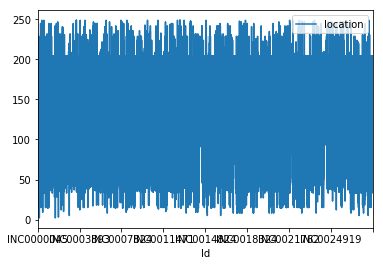

In [91]:
df1.plot(kind="line",x="Id",y="location")
plt.show()

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [93]:
df1=df1.sample(frac=1)

X=df1[["location","category","subcategory","impact","priority","urgency","assigned_to","opened_by","priority",]]
Y=df1["target_days"]


reg = LinearRegression().fit(X, Y)
reg.score(X, Y)
pred=reg.predict(X)

In [94]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y,pred))


10.267516966646339


In [95]:
print(pred)

[16.55045667 14.23645203  9.729153   ... 13.08414124 16.16132357
 12.56254315]


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [98]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
pred1=reg.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred1))

10.358910136040276


In [100]:
from sklearn.svm import SVR
clf = SVR( C=1.0, epsilon=0.1)
clf.fit(X_train, y_train)
pred2=clf.predict(X_test)

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [101]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred2))

7.90324138093218


In [102]:
import seaborn as sns

In [103]:
from sklearn import ensemble
params = {'n_estimators': 800, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_absolute_error(y_test, clf.predict(X_test))

In [104]:
print(mse)

7.862150126996145


<IPython.core.display.Javascript object>


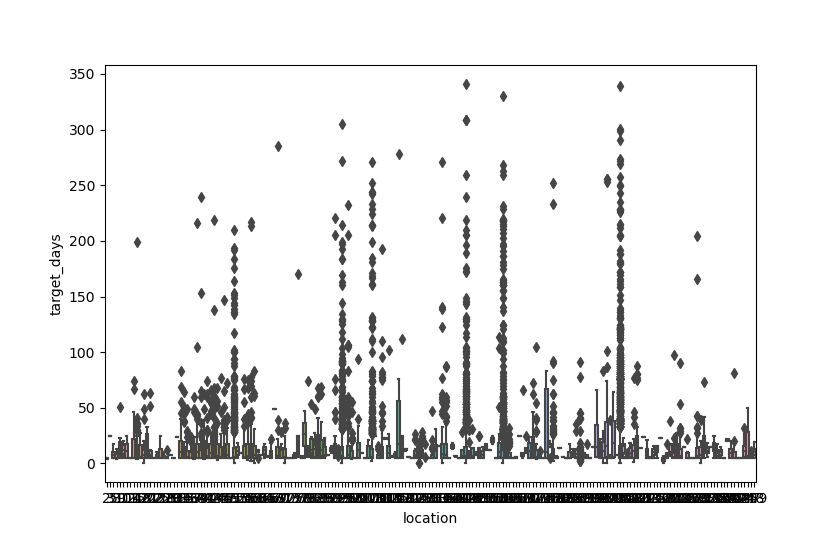

In [143]:
%matplotlib notebook
sns.boxplot(df1["location"],Y)

In [106]:
df2

,Id,reassignment_count,reopen_count,update_count,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,vendor
0,INC0028205,0,0,0,True,Opened by 301,2016-05-11 08:52:00,Phone,Location 161,Category 9,Subcategory 164,2 - Medium,2 - Medium,3 - Moderate,Resolver 249,False,Do Not Notify,NaN
1,INC0028208,0,0,0,True,Opened by 501,2016-05-11 08:53:00,Phone,Location 93,Category 23,Subcategory 174,2 - Medium,2 - Medium,3 - Moderate,Resolver 233,False,Do Not Notify,NaN
2,INC0028209,0,0,0,True,Opened by 24,2016-05-11 08:55:00,Phone,Location 161,Category 32,Subcategory 9,2 - Medium,2 - Medium,3 - Moderate,Resolver 219,False,Do Not Notify,NaN
3,INC0028210,0,0,0,True,Opened by 24,2016-05-11 08:59:00,Phone,Location 143,Category 57,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 7,False,Do Not Notify,NaN
4,INC0028211,0,0,0,True,Opened by 17,2016-05-11 08:59:00,Phone,Location 204,Category 57,Subcategory 146,2 - Medium,2 - Medium,3 - Moderate,Resolver 76,False,Do Not Notify,NaN
5,INC0028212,0,0,0,True,Opened by 24,2016-05-11 08:59:00,Phone,Location 51,Category 32,Subcategory 300,2 - Medium,2 - Medium,3 - Moderate,NaN,False,Do Not Notify,NaN
6,INC0028213,0,0,0,True,Opened by 17,2016-05-11 09:00:00,Phone,Location 204,Category 23,Subcategory 174,2 - Medium,2 - Medium,3 - Moderate,Resolver 125,False,Do Not Notify,NaN
7,INC0028214,0,0,0,True,Opened by 17,2016-05-11 09:00:00,Phone,Location 204,Category 57,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 140,False,Do Not Notify,NaN
8,INC0028215,0,0,0,True,Opened by 62,2016-05-11 09:01:00,Phone,Location 55,Category 42,Subcategory 223,2 - Medium,2 - Medium,3 - Moderate,Resolver 33,False,Do Not Notify,NaN
9,INC0028216,0,0,0,True,Opened by 501,2016-05-11 09:01:00,Phone,Location 136,Category 32,Subcategory 9,2 - Medium,2 - Medium,3 - Moderate,NaN,False,Do Not Notify,NaN


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 18 columns):
Id                    4918 non-null object
reassignment_count    4918 non-null int64
reopen_count          4918 non-null int64
update_count          4918 non-null int64
made_sla              4918 non-null bool
opened_by             4918 non-null object
opened_at             4918 non-null object
contact_type          4918 non-null object
location              4918 non-null object
category              4905 non-null object
subcategory           4905 non-null object
impact                4918 non-null object
urgency               4918 non-null object
priority              4918 non-null object
assigned_to           3187 non-null object
knowledge             4918 non-null bool
notify                4918 non-null object
vendor                9 non-null object
dtypes: bool(2), int64(3), object(13)
memory usage: 624.4+ KB


In [108]:
df2.isnull().sum()

Id                       0
reassignment_count       0
reopen_count             0
update_count             0
made_sla                 0
opened_by                0
opened_at                0
contact_type             0
location                 0
category                13
subcategory             13
impact                   0
urgency                  0
priority                 0
assigned_to           1731
knowledge                0
notify                   0
vendor                4909
dtype: int64

In [109]:
df2.dtypes

Id                    object
reassignment_count     int64
reopen_count           int64
update_count           int64
made_sla                bool
opened_by             object
opened_at             object
contact_type          object
location              object
category              object
subcategory           object
impact                object
urgency               object
priority              object
assigned_to           object
knowledge               bool
notify                object
vendor                object
dtype: object

In [110]:
df2["update_count"].unique()

array([0])

In [111]:
df2.drop(["reassignment_count","reopen_count","update_count","vendor"],axis=1,inplace=True)

In [112]:
df2.head()

,Id,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify
0,INC0028205,True,Opened by 301,2016-05-11 08:52:00,Phone,Location 161,Category 9,Subcategory 164,2 - Medium,2 - Medium,3 - Moderate,Resolver 249,False,Do Not Notify
1,INC0028208,True,Opened by 501,2016-05-11 08:53:00,Phone,Location 93,Category 23,Subcategory 174,2 - Medium,2 - Medium,3 - Moderate,Resolver 233,False,Do Not Notify
2,INC0028209,True,Opened by 24,2016-05-11 08:55:00,Phone,Location 161,Category 32,Subcategory 9,2 - Medium,2 - Medium,3 - Moderate,Resolver 219,False,Do Not Notify
3,INC0028210,True,Opened by 24,2016-05-11 08:59:00,Phone,Location 143,Category 57,Subcategory 170,2 - Medium,2 - Medium,3 - Moderate,Resolver 7,False,Do Not Notify
4,INC0028211,True,Opened by 17,2016-05-11 08:59:00,Phone,Location 204,Category 57,Subcategory 146,2 - Medium,2 - Medium,3 - Moderate,Resolver 76,False,Do Not Notify


In [113]:
df2.drop("made_sla",axis=1,inplace=True)

In [114]:
df2.isnull().sum()

Id                 0
opened_by          0
opened_at          0
contact_type       0
location           0
category          13
subcategory       13
impact             0
urgency            0
priority           0
assigned_to     1731
knowledge          0
notify             0
dtype: int64

In [115]:

df2["category"].describe()

count            4905
unique             46
top       Category 42
freq              901
Name: category, dtype: object

In [116]:
df2["category"].fillna(df2["category"].value_counts().idxmax(),inplace=True)
df2["subcategory"].fillna(df2["subcategory"].value_counts().idxmax(),inplace=True)
df2["assigned_to"].fillna(df2["assigned_to"].value_counts().idxmax(),inplace=True)

In [117]:
df2["category"].describe()

count            4918
unique             46
top       Category 42
freq              914
Name: category, dtype: object

In [118]:
testdf2=[df2]
for data in testdf2:
    data["category"]=data["category"].str.extract('(\d+)',expand=False)
    data["location"]=data["location"].str.extract('(\d+)',expand=False)
    data["subcategory"]=data["subcategory"].str.extract('(\d+)',expand=False)
    data["opened_by"]=data["opened_by"].str.extract('(\d+)',expand=False)
    data["urgency"]=data["urgency"].str.extract('(\d+)',expand=False)
    data["priority"]=data["priority"].str.extract('(\d+)',expand=False)
    data["impact"]=data["impact"].str.extract('(\d+)',expand=False)
    data["assigned_to"]=data["assigned_to"].str.extract('(\d+)',expand=False)


maptf = {False: 0, True: 1}
for dataset in testdf2:
    dataset['knowledge'] = dataset['knowledge'].map(maptf)
    


In [119]:
df2.head()

,Id,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify
0,INC0028205,301,2016-05-11 08:52:00,Phone,161,9,164,2,2,3,249,0,Do Not Notify
1,INC0028208,501,2016-05-11 08:53:00,Phone,93,23,174,2,2,3,233,0,Do Not Notify
2,INC0028209,24,2016-05-11 08:55:00,Phone,161,32,9,2,2,3,219,0,Do Not Notify
3,INC0028210,24,2016-05-11 08:59:00,Phone,143,57,170,2,2,3,7,0,Do Not Notify
4,INC0028211,17,2016-05-11 08:59:00,Phone,204,57,146,2,2,3,76,0,Do Not Notify


In [120]:
df1.head()

,Id,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,notify,target_days
13150,INC0019216,1,386,2016-04-14 13:36:00,Phone,161,26,175,2,2,3,186,0,0,5
13704,INC0020017,1,94,2016-04-16 02:43:00,Phone,179,61,16,2,2,3,17,0,0,7
19839,INC0027991,1,55,2016-05-10 15:50:00,Phone,161,9,174,2,2,3,24,0,0,6
2325,INC0003643,1,59,2016-03-07 14:37:00,Phone,204,40,43,2,2,3,192,1,0,17
17727,INC0025205,1,501,2016-05-03 08:23:00,Phone,204,53,174,2,2,3,17,0,0,7


In [121]:
df2["notify"].unique()

array(['Do Not Notify'], dtype=object)

In [122]:
df1.drop("notify",axis=1,inplace=True)

In [123]:
df2.drop("notify",axis=1,inplace=True)

In [124]:
df2.head()

,Id,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge
0,INC0028205,301,2016-05-11 08:52:00,Phone,161,9,164,2,2,3,249,0
1,INC0028208,501,2016-05-11 08:53:00,Phone,93,23,174,2,2,3,233,0
2,INC0028209,24,2016-05-11 08:55:00,Phone,161,32,9,2,2,3,219,0
3,INC0028210,24,2016-05-11 08:59:00,Phone,143,57,170,2,2,3,7,0
4,INC0028211,17,2016-05-11 08:59:00,Phone,204,57,146,2,2,3,76,0


In [125]:
df1.head()

,Id,made_sla,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge,target_days
13150,INC0019216,1,386,2016-04-14 13:36:00,Phone,161,26,175,2,2,3,186,0,5
13704,INC0020017,1,94,2016-04-16 02:43:00,Phone,179,61,16,2,2,3,17,0,7
19839,INC0027991,1,55,2016-05-10 15:50:00,Phone,161,9,174,2,2,3,24,0,6
2325,INC0003643,1,59,2016-03-07 14:37:00,Phone,204,40,43,2,2,3,192,1,17
17727,INC0025205,1,501,2016-05-03 08:23:00,Phone,204,53,174,2,2,3,17,0,7


In [126]:
df2.head()

,Id,opened_by,opened_at,contact_type,location,category,subcategory,impact,urgency,priority,assigned_to,knowledge
0,INC0028205,301,2016-05-11 08:52:00,Phone,161,9,164,2,2,3,249,0
1,INC0028208,501,2016-05-11 08:53:00,Phone,93,23,174,2,2,3,233,0
2,INC0028209,24,2016-05-11 08:55:00,Phone,161,32,9,2,2,3,219,0
3,INC0028210,24,2016-05-11 08:59:00,Phone,143,57,170,2,2,3,7,0
4,INC0028211,17,2016-05-11 08:59:00,Phone,204,57,146,2,2,3,76,0


In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 12 columns):
Id              4918 non-null object
opened_by       4918 non-null object
opened_at       4918 non-null object
contact_type    4918 non-null object
location        4918 non-null object
category        4918 non-null object
subcategory     4918 non-null object
impact          4918 non-null object
urgency         4918 non-null object
priority        4918 non-null object
assigned_to     4918 non-null object
knowledge       4918 non-null int64
dtypes: int64(1), object(11)
memory usage: 461.1+ KB


In [128]:
df2["location"]=df2["location"].astype(int)
df2["category"]=df2["category"].astype(int)
df2["opened_by"]=df2["opened_by"].astype(int)
df2["impact"]=df2["impact"].astype(int)
df2["urgency"]=df2["urgency"].astype(int)
df2["priority"]=df2["priority"].astype(int)
df2["subcategory"]=df2["subcategory"].astype(int)
df2["assigned_to"]=df2["assigned_to"].astype(int)



In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 12 columns):
Id              4918 non-null object
opened_by       4918 non-null int64
opened_at       4918 non-null object
contact_type    4918 non-null object
location        4918 non-null int64
category        4918 non-null int64
subcategory     4918 non-null int64
impact          4918 non-null int64
urgency         4918 non-null int64
priority        4918 non-null int64
assigned_to     4918 non-null int64
knowledge       4918 non-null int64
dtypes: int64(9), object(3)
memory usage: 461.1+ KB


In [130]:
df2.isnull().sum()

Id              0
opened_by       0
opened_at       0
contact_type    0
location        0
category        0
subcategory     0
impact          0
urgency         0
priority        0
assigned_to     0
knowledge       0
dtype: int64

In [131]:
df2=df2.sample(frac=1)

X_tester1=df2[["location","category","subcategory","impact","urgency","priority","assigned_to","opened_by","priority",]]
#Y=df2["target_days"]

In [132]:
from sklearn.svm import SVR
clf1 = SVR( C=1.0, epsilon=0.1)
clf1.fit(X_train, y_train)
prediction=clf1.predict(X_tester1)

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [133]:
print(prediction)

[5.56833126 7.45112001 7.80880927 ... 7.62249653 7.4727765  5.56408949]


In [134]:
r=pd.DataFrame()

In [135]:
r["Id"]=df2["Id"]
r["target_days"]=prediction

In [136]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 864 to 4032
Data columns (total 2 columns):
Id             4918 non-null object
target_days    4918 non-null float64
dtypes: float64(1), object(1)
memory usage: 115.3+ KB


In [137]:
r["target_days"]=r["target_days"].astype(int)

In [138]:
r.head()

,Id,target_days
864,INC0029360,5
4638,INC0034429,7
526,INC0028909,7
574,INC0028983,5
1208,INC0029803,5


In [139]:
r.drop("target",axis=1,inplace=True)

KeyError: "['target'] not found in axis"

In [ ]:
r.head()

In [ ]:
r.to_csv('mycsvfile.csv',index=False)

In [ ]:
r.info()

<IPython.core.display.Javascript object>


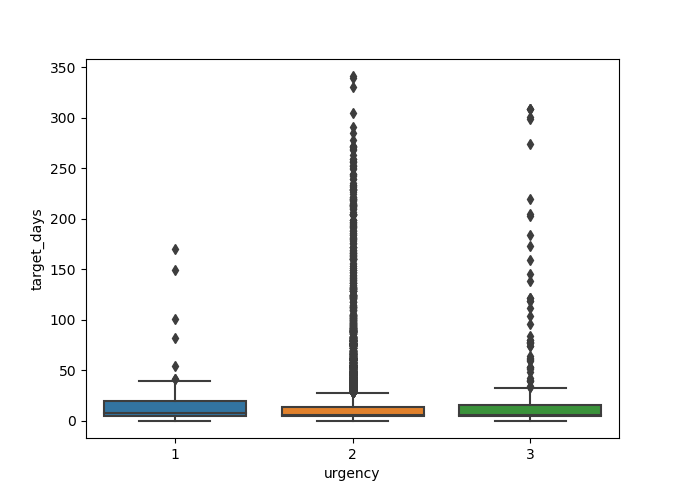

In [144]:
%matplotlib notebook
sns.boxplot(df1["urgency"],Y)

<IPython.core.display.Javascript object>


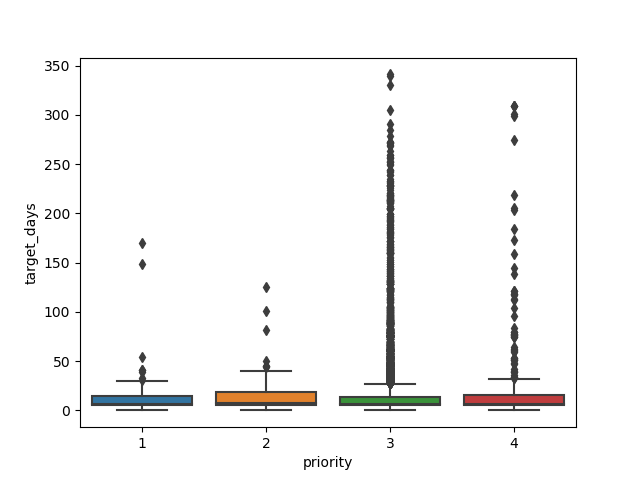

In [145]:
%matplotlib notebook
sns.boxplot(df1["priority"],Y)

<IPython.core.display.Javascript object>


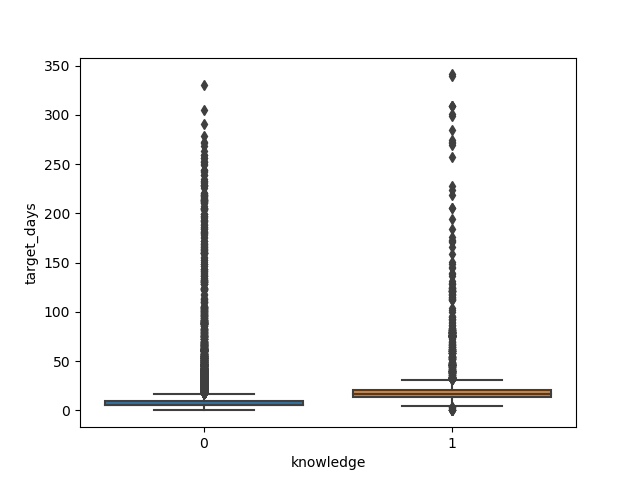

In [146]:
%matplotlib notebook
sns.boxplot(df1["knowledge"],Y)

<IPython.core.display.Javascript object>


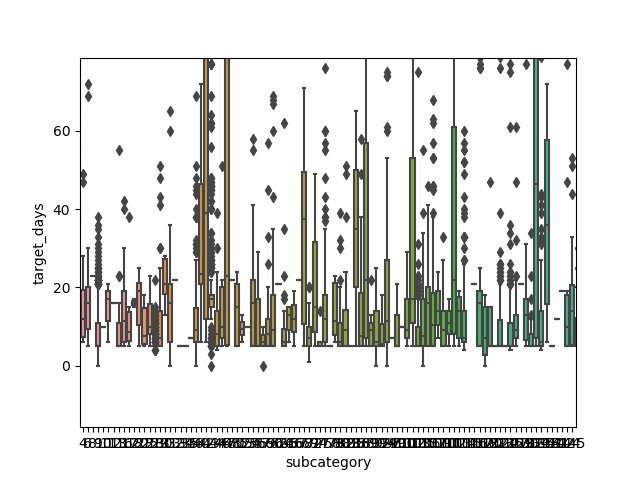

In [147]:
%matplotlib notebook
sns.boxplot(df1["subcategory"],Y)